In [60]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
# Creating directory to access the dataset
dir_path = "gdrive/My Drive/Dataset"

In [62]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/Dataset/amer_sign2.png
gdrive/My Drive/Dataset/amer_sign3.png
gdrive/My Drive/Dataset/american_sign_language.PNG
gdrive/My Drive/Dataset/.DS_Store
gdrive/My Drive/Dataset/sign_mnist_test.csv
gdrive/My Drive/Dataset/sign_mnist_train.csv
gdrive/My Drive/Dataset/sign_mnist_test/sign_mnist_test.csv


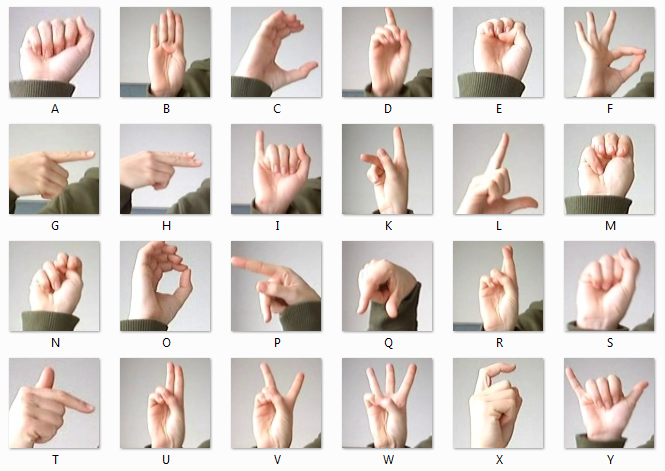

In [63]:
from IPython.display import Image
Image("gdrive/My Drive/Dataset/amer_sign2.png")

In [64]:
# Importing dependencies
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [66]:
# Assigning train and test variables
train_data = pd.read_csv('gdrive/My Drive/Dataset/sign_mnist_train.csv')
test_data = pd.read_csv('gdrive/My Drive/Dataset/sign_mnist_test.csv')

In [ ]:
# Examining and preparing the dataset

In [67]:
print(train_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [68]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [69]:
# Converting the dataframes to arrays for further preprocessing and visualization
train_set = np.array(train_data, dtype = 'float32')
test_set = np.array(test_data, dtype='float32')

In [70]:
# Specifying class labels. This will be our text for translating to sign language
texts = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
               'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q',
               'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

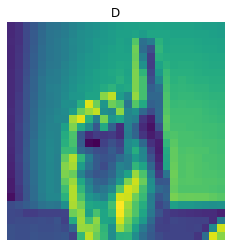

In [71]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train_data["label"][i]
plt.title(f"{texts[label_index]}")
plt.axis('off')


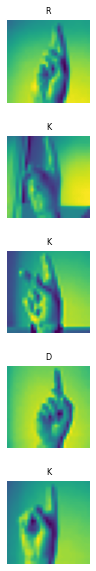

In [72]:
### Plotting more random images from thr train data
# Define the dimension of the plot 
texts_to_sign = 5

fig, axes = plt.subplots( texts_to_sign, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, texts_to_sign ): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(texts[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [73]:
# Preparing the training and testing datasets and normalizing the train set
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

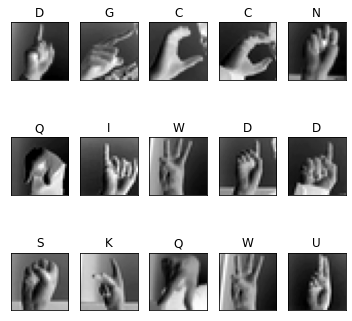

In [74]:
# Plotting and visualizing some images from the normalized train set with respective y labels

plt.figure(figsize=(6, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(texts[label_index])
plt.show()

In [75]:
# Splitting the train and test sets, using 20% of the data for testing, and using a large random state
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [59]:
# Our new dataset shape
print(X_train.shape)
print(y_train.shape)

(11244, 784)
(11244,)


In [77]:
# Training and test turplets
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [78]:
# Defining the CNN Model (our GAN for sign language) using Keras

# Importing dependencies
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [79]:
# The CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 25, activation = 'softmax'))


# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [80]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

# Training the CNN 

# Assigning values to parameters
batch_size = 512
epochs = 50
verbose = 1

history = model.fit(X_train, y_train, batch_size, epochs, verbose, validation_data = (X_val, y_val))

Epoch 1/50
43/43 [==============================] - 22s 493ms/step - loss: 3.1554 - accuracy: 0.0607 - val_loss: 2.9451 - val_accuracy: 0.1115
Epoch 2/50
43/43 [==============================] - 21s 490ms/step - loss: 2.6076 - accuracy: 0.1864 - val_loss: 2.0530 - val_accuracy: 0.3653
Epoch 3/50
43/43 [==============================] - 25s 582ms/step - loss: 1.8592 - accuracy: 0.3852 - val_loss: 1.3161 - val_accuracy: 0.5908
Epoch 4/50
43/43 [==============================] - 26s 617ms/step - loss: 1.3211 - accuracy: 0.5555 - val_loss: 0.9102 - val_accuracy: 0.7139
Epoch 5/50
43/43 [==============================] - 25s 580ms/step - loss: 1.0211 - accuracy: 0.6499 - val_loss: 0.6537 - val_accuracy: 0.8053
Epoch 6/50
43/43 [==============================] - 21s 489ms/step - loss: 0.8341 - accuracy: 0.7174 - val_loss: 0.4681 - val_accuracy: 0.8723
Epoch 7/50
43/43 [==============================] - 21s 488ms/step - loss: 0.6659 - accuracy: 0.7723 - val_loss: 0.3616 - val_accuracy: 0.8995

In [81]:
# Model Evaluation
model.evaluate(X_val,y_val)

172/172 [==============================] - 2s 13ms/step - loss: 3.6101e-04 - accuracy: 1.0000


[0.0003610146522987634, 1.0]

Text(0.5, 1.0, 'Accuracy ')

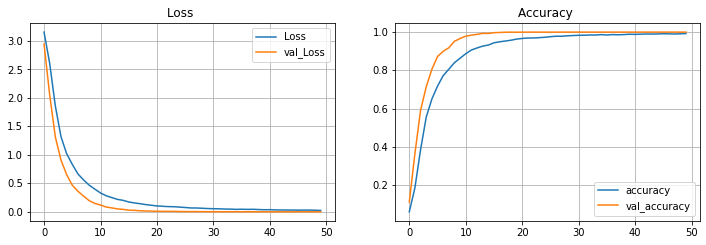

In [82]:
# Plotting the model to visualize performance of accuracy and loss
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss ')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy ')

172/172 [==============================] - 2s 13ms/step


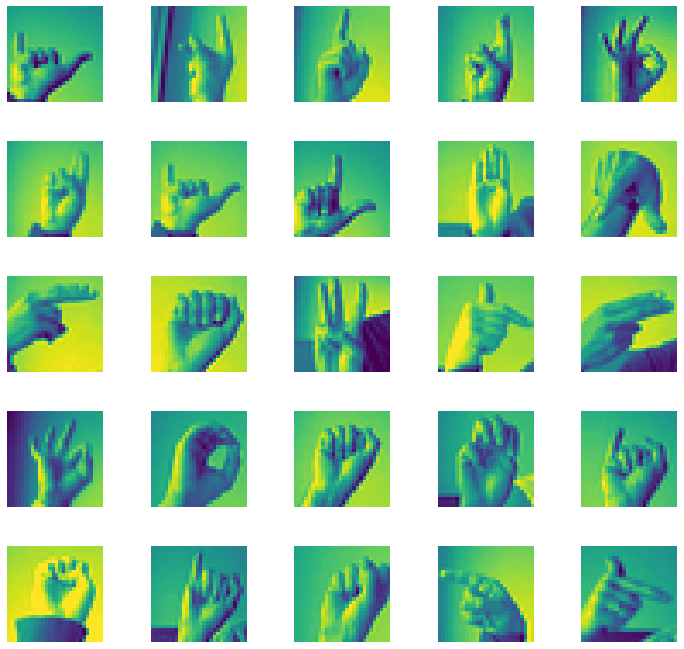

In [112]:
# Performing prediction with the test data with a random plot
predict_texts = model.predict(X_val)


#parameter grids
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_val[i].reshape(28,28))
   # axes[i].set_title(f"Prediction Class = {predict_texts[i]:0.1f}\n True Class = {y_val[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)